In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

df = pd.read_csv("/Users/kalyankumar/Downloads/Combined_Data_Cleaned_Preprocessed 2 (1).csv")
display(df)

,statement,status,processed_statement,processed_status
0,oh my gosh,Anxiety,oh my gosh,anxiety
1,trouble sleeping confused mind restless heart....,Anxiety,trouble sleeping confused mind restless heart ...,anxiety
2,All wrong back off dear forward doubt. Stay in...,Anxiety,all wrong back off dear forward doubt stay in ...,anxiety
3,I've shifted my focus to something else but I'...,Anxiety,ive shifted my focus to something else but im ...,anxiety
4,I'm restless and restless it's been a month no...,Anxiety,im restless and restless its been a month now ...,anxiety
...,...,...,...,...
52675,Nobody takes me seriously Ive 24M dealt with d...,Anxiety,nobody takes me seriously ive 24m dealt with d...,anxiety
52676,selfishness I don't feel very good it's like ...,Anxiety,selfishness i dont feel very good its like i d...,anxiety
52677,Is there any way to sleep better I can't sleep...,Anxiety,is there any way to sleep better i cant sleep ...,anxiety
52678,Public speaking tips Hi all. I have to give a ...,Anxiety,public speaking tips hi all i have to give a p...,anxiety


#### Filtering out "Normal" entries

In [2]:
# # Convert to lowercase to handle any case mismatch
# df['status'] = df['status'].str.lower()
# df['processed_status'] = df['processed_status'].str.lower()

# # Filter out rows where either column has 'normal'
# df_filtered = df[(df['status'] != 'normal') & (df['processed_status'] != 'normal')]

# # Optional: reset index after filtering
# df_filtered.reset_index(drop=True, inplace=True)

# # Display the cleaned dataframe
# display(df_filtered)

In [3]:
# # Check for 'normal' in 'status' column
# normal_in_status = df_filtered[df_filtered['status'] == 'normal']

# # Check for 'normal' in 'processed_status' column
# normal_in_processed_status = df_filtered[df_filtered['processed_status'] == 'normal']

# # Display results (if any)
# print("Rows with 'normal' in status:", len(normal_in_status))
# print("Rows with 'normal' in processed_status:", len(normal_in_processed_status))

In [4]:
# # Drop null statements and standardize case
# df_clean = df.dropna(subset=['processed_statement'])
# df_clean['processed_status'] = df_clean['processed_status'].str.lower()

# # Remove 'normal' class
# df_clean = df_clean[df_clean['processed_status'] != 'normal']

# # Reset index
# df_clean.reset_index(drop=True, inplace=True)

In [5]:
# Drop rows with null 'processed_statement' and standardize text case
df_clean = df.dropna(subset=['processed_statement'])
df_clean['status'] = df_clean['status'].str.lower()
df_clean['processed_status'] = df_clean['processed_status'].str.lower()

# Do NOT remove 'normal' class — retain all categories
df_clean.reset_index(drop=True, inplace=True)

# Display the cleaned dataframe
display(df_clean)

# Check how many 'normal' entries are present
normal_in_status = df_clean[df_clean['status'] == 'normal']
normal_in_processed_status = df_clean[df_clean['processed_status'] == 'normal']

# Display counts
print("Rows with 'normal' in status:", len(normal_in_status))
print("Rows with 'normal' in processed_status:", len(normal_in_processed_status))


/var/folders/ll/td_47sl10rv9pnn8y8p56fdr0000gn/T/ipykernel_23762/1082743407.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['status'] = df_clean['status'].str.lower()
/var/folders/ll/td_47sl10rv9pnn8y8p56fdr0000gn/T/ipykernel_23762/1082743407.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['processed_status'] = df_clean['processed_status'].str.lower()


,statement,status,processed_statement,processed_status
0,oh my gosh,anxiety,oh my gosh,anxiety
1,trouble sleeping confused mind restless heart....,anxiety,trouble sleeping confused mind restless heart ...,anxiety
2,All wrong back off dear forward doubt. Stay in...,anxiety,all wrong back off dear forward doubt stay in ...,anxiety
3,I've shifted my focus to something else but I'...,anxiety,ive shifted my focus to something else but im ...,anxiety
4,I'm restless and restless it's been a month no...,anxiety,im restless and restless its been a month now ...,anxiety
...,...,...,...,...
52672,Nobody takes me seriously Ive 24M dealt with d...,anxiety,nobody takes me seriously ive 24m dealt with d...,anxiety
52673,selfishness I don't feel very good it's like ...,anxiety,selfishness i dont feel very good its like i d...,anxiety
52674,Is there any way to sleep better I can't sleep...,anxiety,is there any way to sleep better i cant sleep ...,anxiety
52675,Public speaking tips Hi all. I have to give a ...,anxiety,public speaking tips hi all i have to give a p...,anxiety


Rows with 'normal' in status: 16340
Rows with 'normal' in processed_status: 16340


In [6]:
display(df_clean.head())

,statement,status,processed_statement,processed_status
0,oh my gosh,anxiety,oh my gosh,anxiety
1,trouble sleeping confused mind restless heart....,anxiety,trouble sleeping confused mind restless heart ...,anxiety
2,All wrong back off dear forward doubt. Stay in...,anxiety,all wrong back off dear forward doubt stay in ...,anxiety
3,I've shifted my focus to something else but I'...,anxiety,ive shifted my focus to something else but im ...,anxiety
4,I'm restless and restless it's been a month no...,anxiety,im restless and restless its been a month now ...,anxiety


In [7]:
# General info (column types, non-null counts)
df_clean.info()

# First few rows
df_clean.head()

# Shape of the dataset
print("Shape of dataset:", df_clean.shape)

# Class distribution
print("\nClass distribution in 'processed_status':")
print(df_clean['processed_status'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52677 entries, 0 to 52676
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   statement            52677 non-null  object
 1   status               52677 non-null  object
 2   processed_statement  52677 non-null  object
 3   processed_status     52677 non-null  object
dtypes: object(4)
memory usage: 1.6+ MB
Shape of dataset: (52677, 4)

Class distribution in 'processed_status':
processed_status
normal                  16340
depression              15404
suicidal                10651
anxiety                  3841
bipolar                  2777
stress                   2587
personality disorder     1077
Name: count, dtype: int64


#### Distribution of Mental Health Disorders

/var/folders/ll/td_47sl10rv9pnn8y8p56fdr0000gn/T/ipykernel_23762/125485154.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette="pastel")


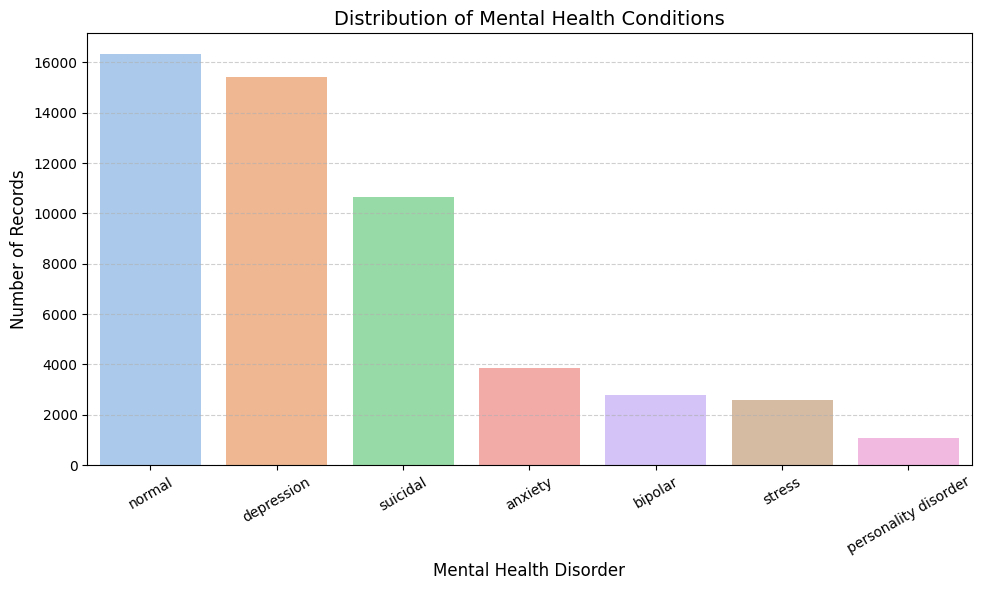

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot: Distribution of target classes
plt.figure(figsize=(10, 6))
status_counts = df_clean['processed_status'].value_counts()

# Barplot
sns.barplot(x=status_counts.index, y=status_counts.values, palette="pastel")
plt.title("Distribution of Mental Health Conditions", fontsize=14)
plt.ylabel("Number of Records", fontsize=12)
plt.xlabel("Mental Health Disorder", fontsize=12)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Word Clouds per Disorder

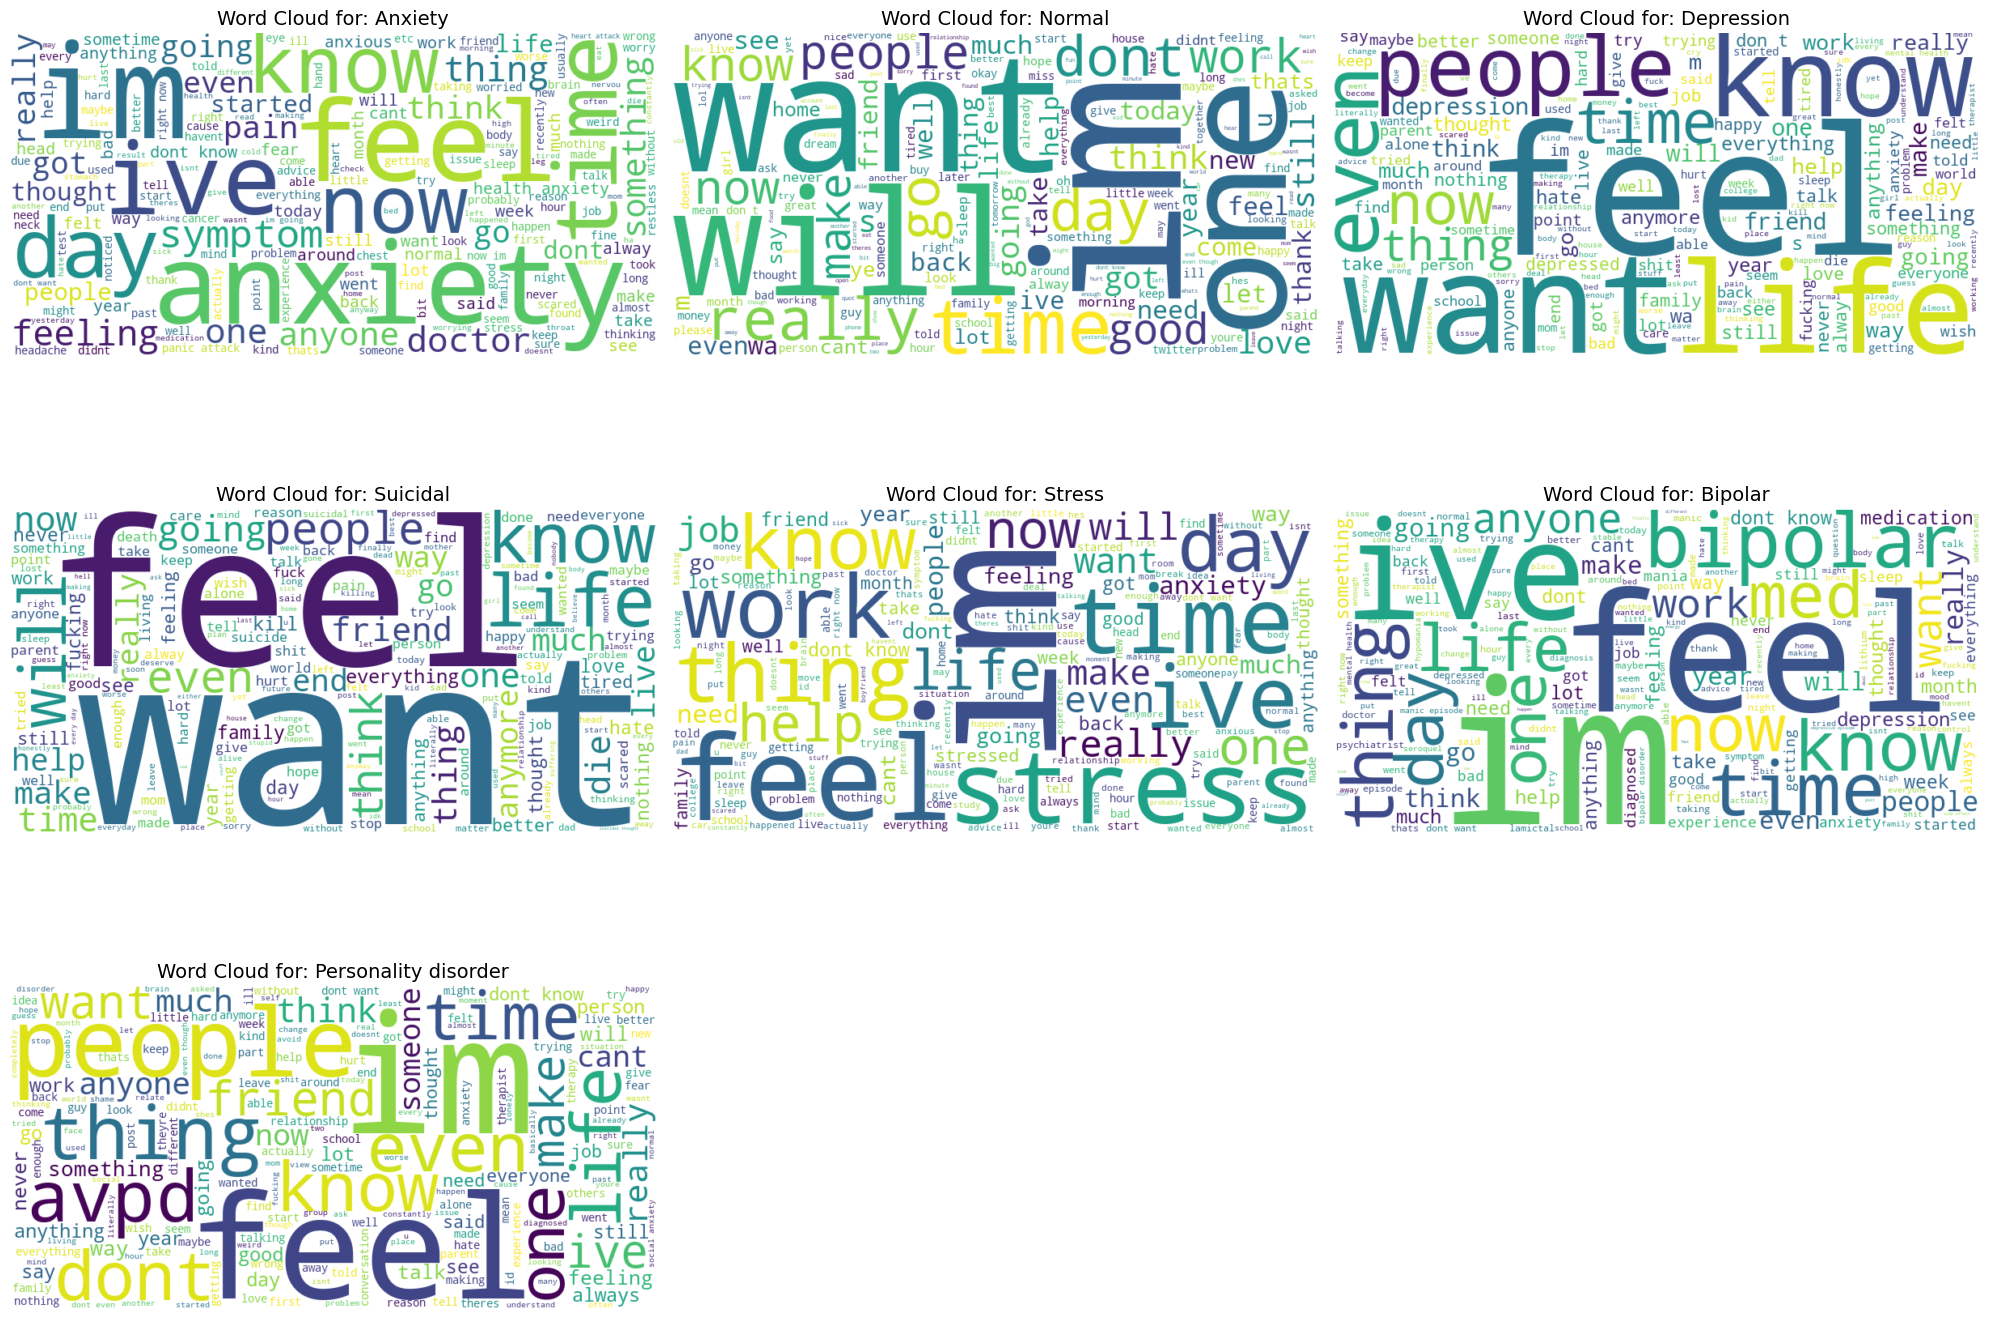

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get unique classes
unique_statuses = df_clean['processed_status'].unique()

# Setup figure
plt.figure(figsize=(20, 15))

# Loop and generate word clouds
for i, status in enumerate(unique_statuses):
    # Combine all processed statements of the current class
    text = " ".join(df_clean[df_clean['processed_status'] == status]['processed_statement'].dropna())
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
    
    # Plot each subplot
    plt.subplot(3, 3, i + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for: {status.capitalize()}", fontsize=14)

plt.tight_layout()
plt.show()

#### Statement Length Distribution

/var/folders/ll/td_47sl10rv9pnn8y8p56fdr0000gn/T/ipykernel_23762/2042546626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['statement_length'] = df_clean['processed_statement'].apply(lambda x: len(str(x).split()))
/var/folders/ll/td_47sl10rv9pnn8y8p56fdr0000gn/T/ipykernel_23762/2042546626.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='processed_status', y='statement_length', data=df_clean, palette='Set2')


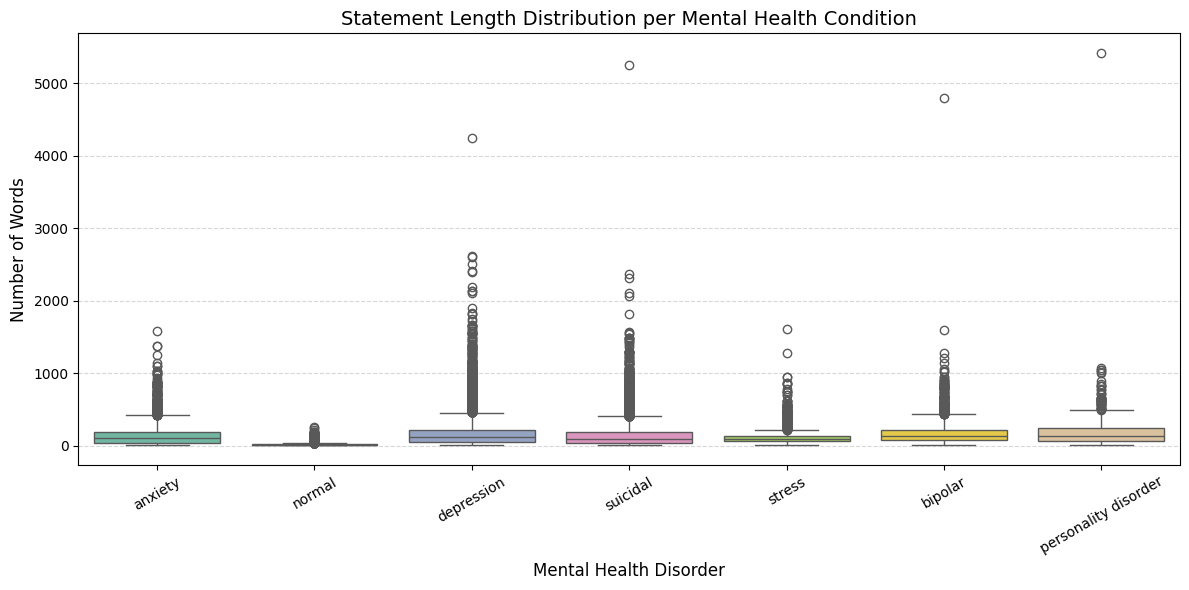

In [10]:
# Add a new column for statement length (in words)
df_clean['statement_length'] = df_clean['processed_statement'].apply(lambda x: len(str(x).split()))

# Plot: Boxplot of statement lengths
plt.figure(figsize=(12, 6))
sns.boxplot(x='processed_status', y='statement_length', data=df_clean, palette='Set2')
plt.title("Statement Length Distribution per Mental Health Condition", fontsize=14)
plt.xlabel("Mental Health Disorder", fontsize=12)
plt.ylabel("Number of Words", fontsize=12)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### Pie Chart of Disorders

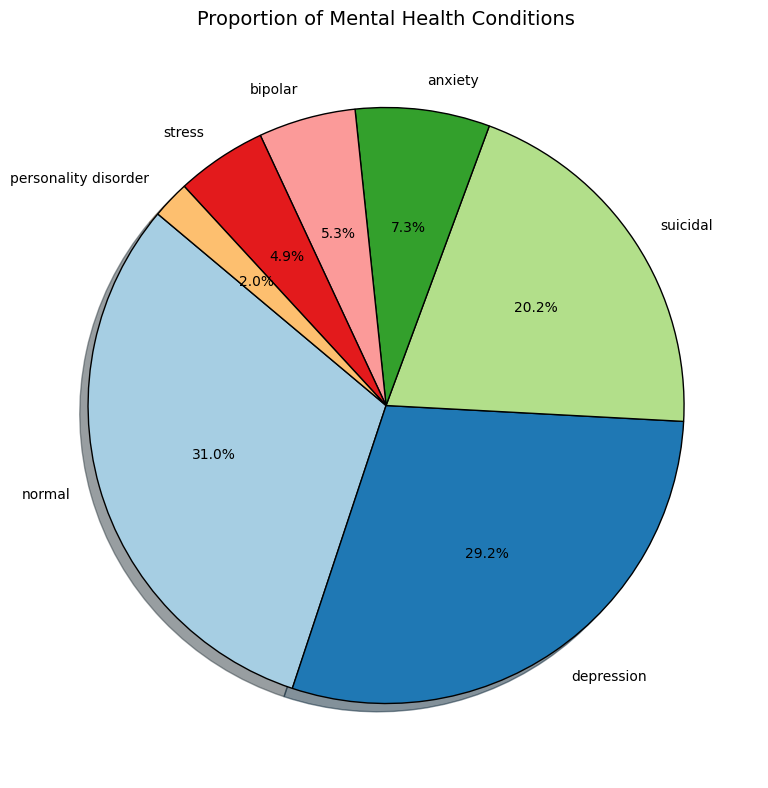

In [11]:
#Recalculate status counts just to be sure
status_counts = df_clean['processed_status'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
status_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=140,
    shadow=True,
    colors=plt.cm.Paired.colors,  # Optional: consistent color palette
    wedgeprops={'edgecolor': 'black'}
)
plt.title("Proportion of Mental Health Conditions", fontsize=14)
plt.ylabel('')  # Remove y-label for clean look
plt.tight_layout()
plt.show()

#### Histogram of Statement Lengths

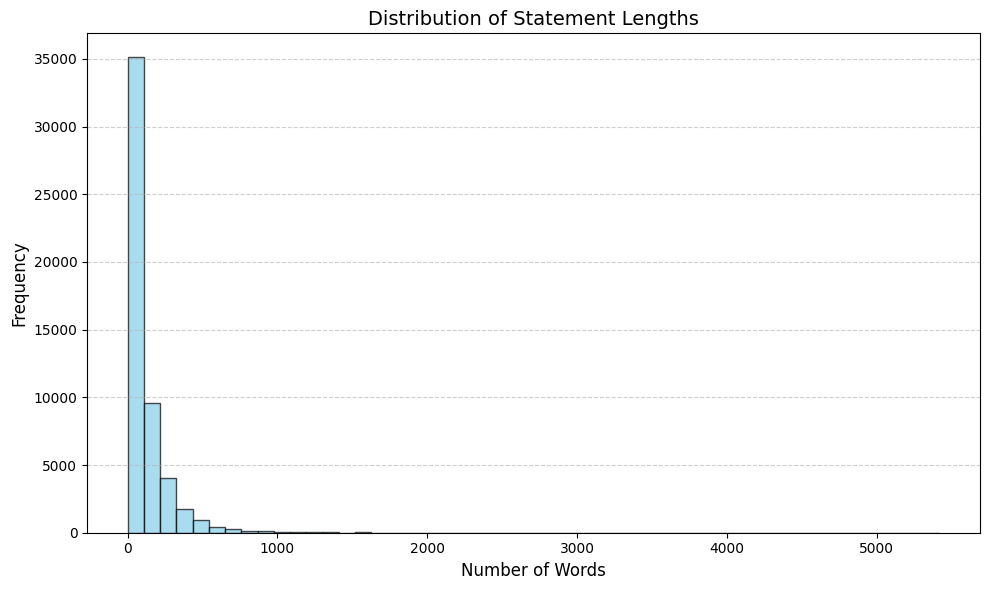

In [12]:
plt.figure(figsize=(10, 6))
df_clean['statement_length'].plot(kind='hist', bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Statement Lengths", fontsize=14)
plt.xlabel("Number of Words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Average Statement Length per Condition

/var/folders/ll/td_47sl10rv9pnn8y8p56fdr0000gn/T/ipykernel_23762/33639030.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_len.index, y=avg_len.values, palette='Set3')


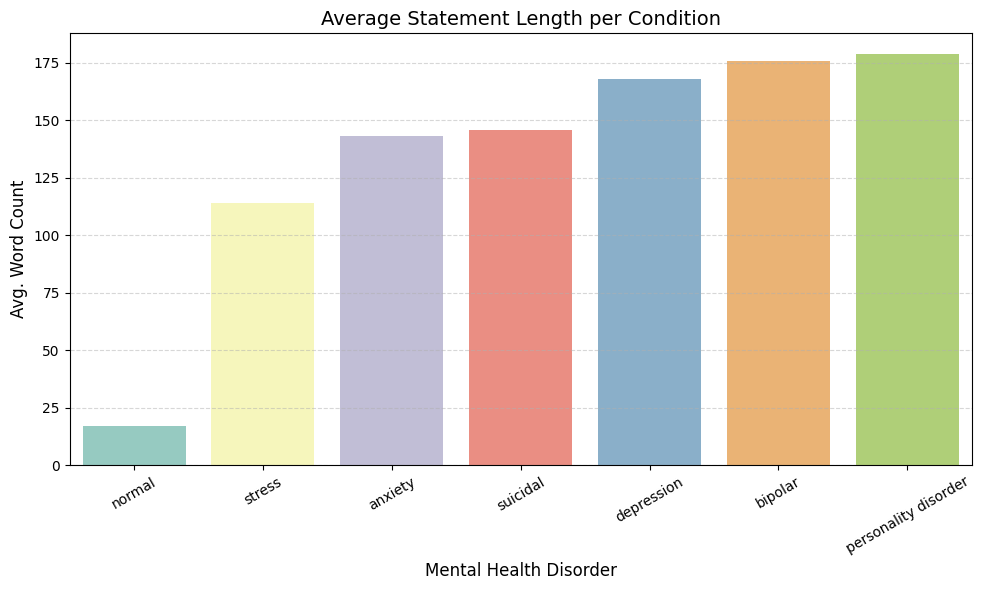

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average statement length per condition
avg_len = df_clean.groupby('processed_status')['statement_length'].mean().sort_values()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_len.index, y=avg_len.values, palette='Set3')
plt.title("Average Statement Length per Condition", fontsize=14)
plt.ylabel("Avg. Word Count", fontsize=12)
plt.xlabel("Mental Health Disorder", fontsize=12)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### Top 15 Most Common Words

/var/folders/ll/td_47sl10rv9pnn8y8p56fdr0000gn/T/ipykernel_23762/975055095.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="Blues_d")


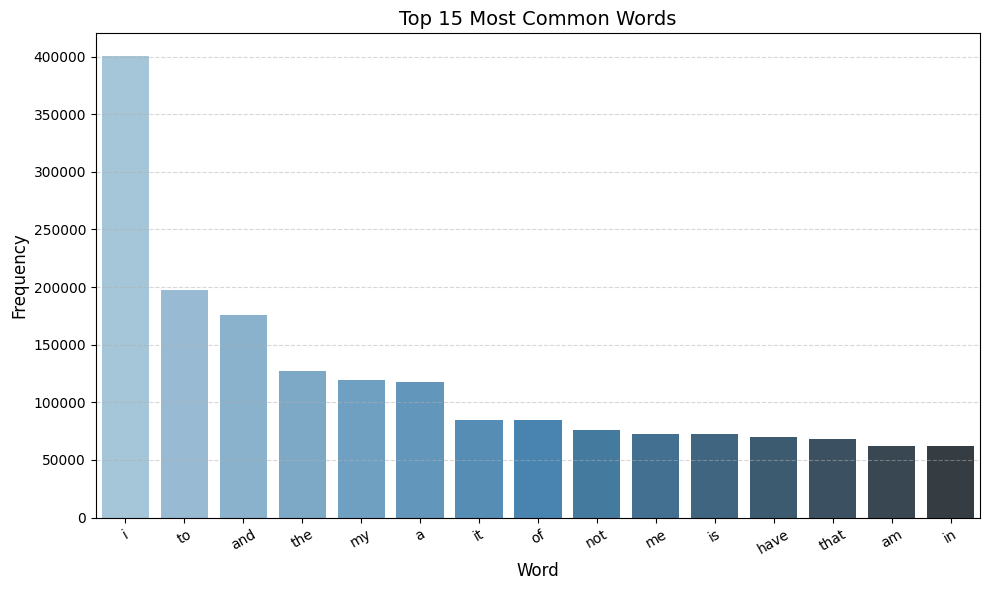

In [15]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Get most common words
all_words = " ".join(df_clean['processed_statement'].dropna()).split()
most_common = Counter(all_words).most_common(15)
words, counts = zip(*most_common)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(words), y=list(counts), palette="Blues_d")
plt.title("Top 15 Most Common Words", fontsize=14)
plt.ylabel("Frequency", fontsize=12)
plt.xlabel("Word", fontsize=12)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### Short vs Long Statement Counts per Disorder

/var/folders/ll/td_47sl10rv9pnn8y8p56fdr0000gn/T/ipykernel_23762/2123437086.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['length_type'] = df_clean['statement_length'].apply(


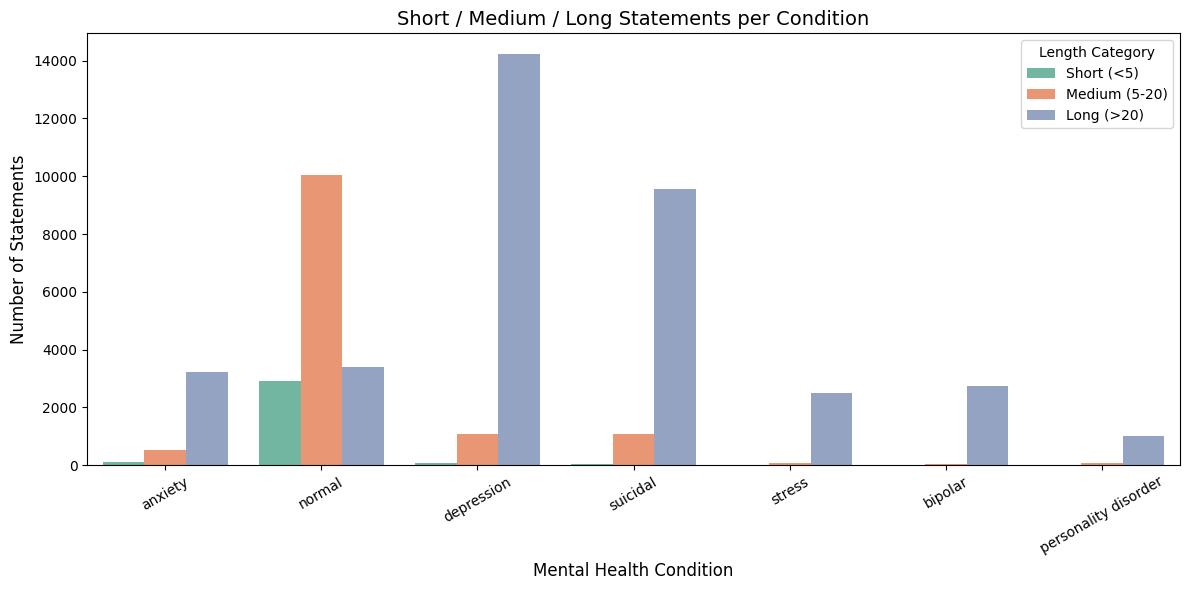

In [16]:
# Categorize statement lengths
df_clean['length_type'] = df_clean['statement_length'].apply(
    lambda x: 'Short (<5)' if x < 5 else 'Long (>20)' if x > 20 else 'Medium (5-20)'
)

# Plot grouped count by class and length category
plt.figure(figsize=(12, 6))
sns.countplot(data=df_clean, x='processed_status', hue='length_type', palette='Set2')

plt.title("Short / Medium / Long Statements per Condition", fontsize=14)
plt.xlabel("Mental Health Condition", fontsize=12)
plt.ylabel("Number of Statements", fontsize=12)
plt.xticks(rotation=30)
plt.legend(title='Length Category')
plt.tight_layout()
plt.show()

#### Heatmap of Length Types per Disorder

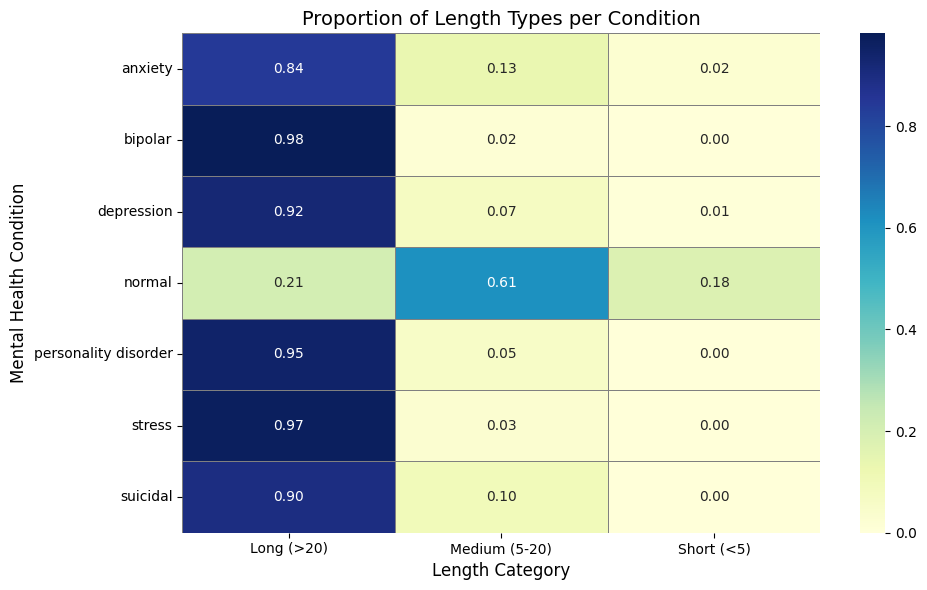

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create proportion table
length_counts = pd.crosstab(
    df_clean['processed_status'],
    df_clean['length_type'],
    normalize='index'
)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(length_counts, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5, linecolor='gray')

plt.title("Proportion of Length Types per Condition", fontsize=14)
plt.xlabel("Length Category", fontsize=12)
plt.ylabel("Mental Health Condition", fontsize=12)
plt.tight_layout()
plt.show()

#### Boxplot of Statement Lengths per Condition

/var/folders/ll/td_47sl10rv9pnn8y8p56fdr0000gn/T/ipykernel_23762/671655337.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='processed_status', y='statement_length', palette='Set3')


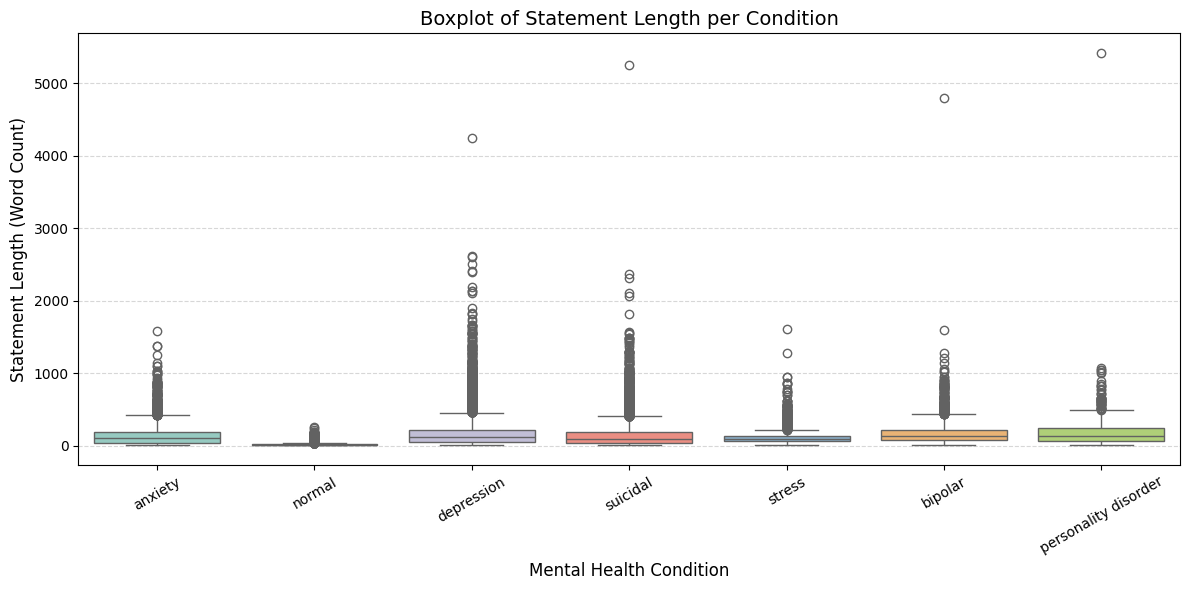

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean, x='processed_status', y='statement_length', palette='Set3')

plt.title("Boxplot of Statement Length per Condition", fontsize=14)
plt.xlabel("Mental Health Condition", fontsize=12)
plt.ylabel("Statement Length (Word Count)", fontsize=12)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### Violin Plot of Statement Lengths

/var/folders/ll/td_47sl10rv9pnn8y8p56fdr0000gn/T/ipykernel_23762/508440173.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_clean, x='processed_status', y='statement_length', palette='Pastel1', inner='box')


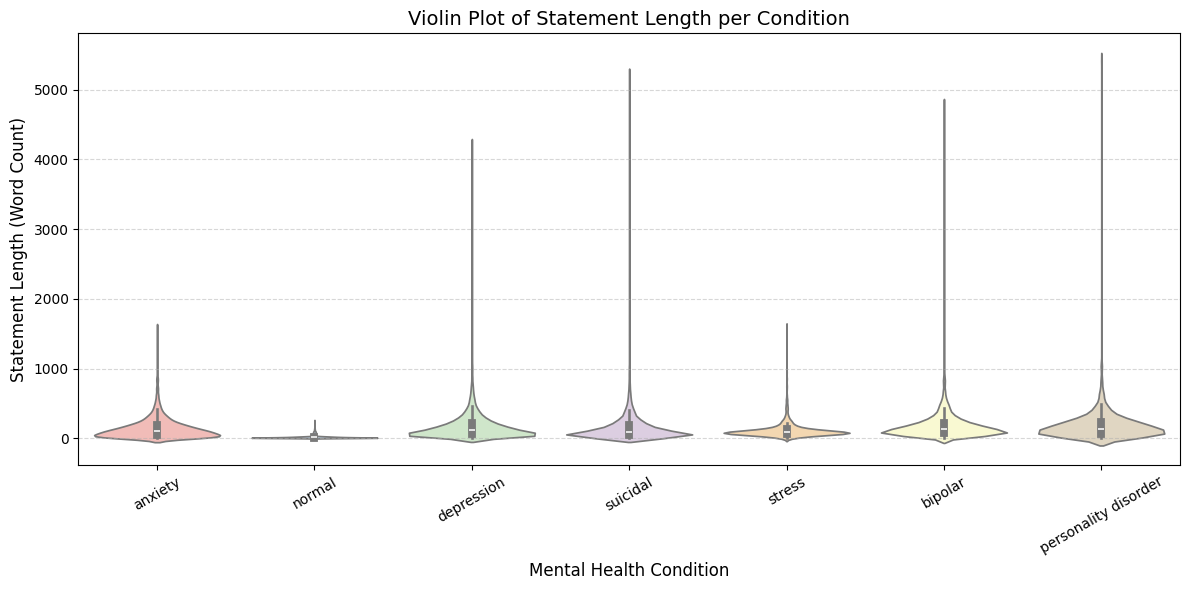

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.violinplot(data=df_clean, x='processed_status', y='statement_length', palette='Pastel1', inner='box')

plt.title("Violin Plot of Statement Length per Condition", fontsize=14)
plt.xlabel("Mental Health Condition", fontsize=12)
plt.ylabel("Statement Length (Word Count)", fontsize=12)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### Density Plot of Word Count per Disorder

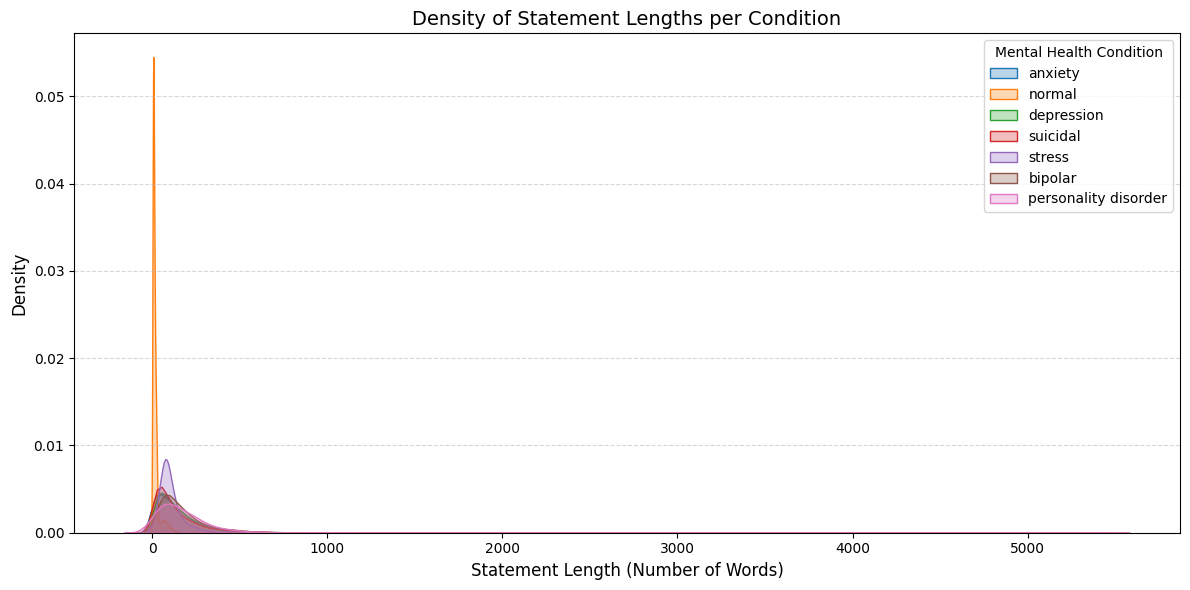

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Loop through each unique condition and plot KDE
for label in df_clean['processed_status'].unique():
    sns.kdeplot(
        data=df_clean[df_clean['processed_status'] == label],
        x='statement_length',
        label=label,
        fill=True,   
        alpha=0.3   
    )

plt.title("Density of Statement Lengths per Condition", fontsize=14)
plt.xlabel("Statement Length (Number of Words)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="Mental Health Condition")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### Top 15 Bigrams

/var/folders/ll/td_47sl10rv9pnn8y8p56fdr0000gn/T/ipykernel_23762/1469141765.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_bigrams, x='bigram', y='frequency', palette='coolwarm')


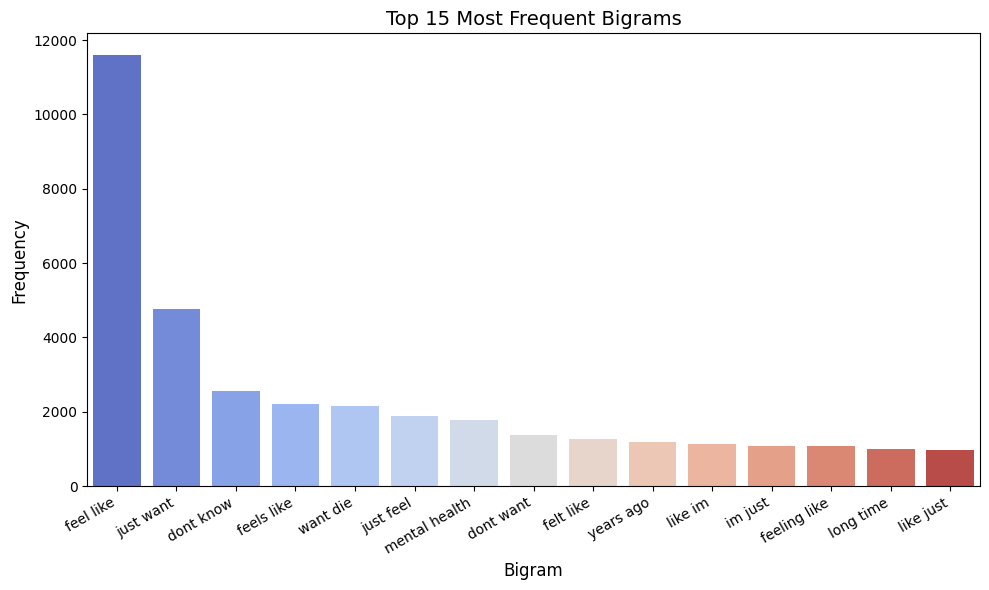

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract bigrams
bigram_vec = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X_bigram = bigram_vec.fit_transform(df_clean['processed_statement'].dropna())

# Create bigram frequency DataFrame
bigram_freq = X_bigram.sum(axis=0).A1
bigram_names = bigram_vec.get_feature_names_out()
bigram_df = pd.DataFrame({'bigram': bigram_names, 'frequency': bigram_freq})
top_bigrams = bigram_df.sort_values(by='frequency', ascending=False).head(15)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_bigrams, x='bigram', y='frequency', palette='coolwarm')
plt.title("Top 15 Most Frequent Bigrams", fontsize=14)
plt.xlabel("Bigram", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

### Topic Modeling using LDA

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd

# Sample up to 1000 per class (for performance and balance)
sampled_df = df_clean.groupby('processed_status').apply(
    lambda x: x.sample(n=min(1000, len(x)), random_state=42)
).reset_index(drop=True)

# Vectorize processed text
vectorizer = CountVectorizer(
    max_df=0.95,        # Ignore very common terms
    min_df=5,           # Ignore very rare terms
    stop_words='english'
)
doc_term_matrix = vectorizer.fit_transform(sampled_df['processed_statement'].dropna())

# Fit LDA model
lda_model = LatentDirichletAllocation(
    n_components=7,     # Number of topics to extract
    random_state=42,
    learning_method='batch'  
)
lda_model.fit(doc_term_matrix)

/var/folders/ll/td_47sl10rv9pnn8y8p56fdr0000gn/T/ipykernel_23762/1950394628.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df_clean.groupby('processed_status').apply(


LatentDirichletAllocation(n_components=7, random_state=42)

#### Display Topics and Top Keywords

In [23]:
# Display top words for each topic
def display_topics(model, feature_names, no_top_words=10):
    for idx, topic in enumerate(model.components_):
        print(f"Topic {idx + 1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[-no_top_words:][::-1]]))
        print()

display_topics(lda_model, vectorizer.get_feature_names_out(), 10)

Topic 1:
just, time, job, know, work, got, help, going, like, year

Topic 2:
im, like, dont, just, feel, ive, anxiety, know, really, people

Topic 3:
just, want, feel, like, life, know, people, going, friends, think

Topic 4:
pain, anxiety, heart, symptoms, health, chest, ha, blood, got, don

Topic 5:
like, just, friend, people, really, said, wa, talk, time, did

Topic 6:
im, ive, just, bipolar, dont, like, really, know, depression, meds

Topic 7:
stress, people, work, help, im, feel, life, mental, need, way



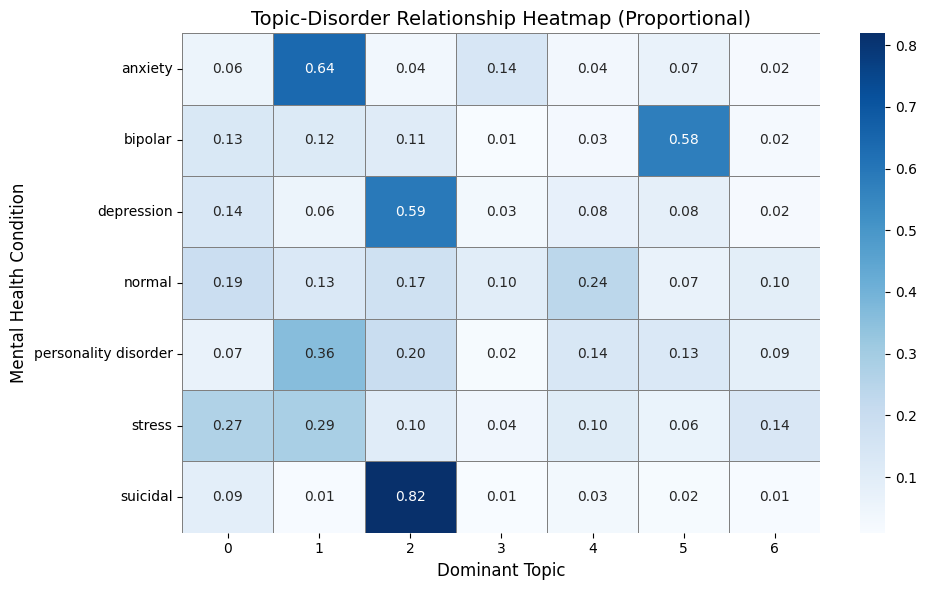

In [24]:
# 🏷 Step 1: Assign dominant topic to each statement
topic_distribution = lda_model.transform(doc_term_matrix)
sampled_df['dominant_topic'] = topic_distribution.argmax(axis=1)

# 📊 Step 2: Create crosstab of disorder vs dominant topic
topic_condition_matrix = pd.crosstab(
    sampled_df['processed_status'],
    sampled_df['dominant_topic']
)

# 🔢 Step 3: Normalize to get row-wise proportions
topic_condition_norm = topic_condition_matrix.div(topic_condition_matrix.sum(axis=1), axis=0)

# 🎨 Step 4: Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(topic_condition_norm, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5, linecolor='gray')

plt.title("Topic-Disorder Relationship Heatmap (Proportional)", fontsize=14)
plt.xlabel("Dominant Topic", fontsize=12)
plt.ylabel("Mental Health Condition", fontsize=12)
plt.tight_layout()
plt.show()